In [33]:
import pandas as pd 
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

%matplotlib inline

In [8]:
df = pd.read_csv('data_combined_norm_allgroups.csv')

In [9]:
df

,Exp,Well ID,Field,Age,Sample,Type,DAPI nucleus intensity mean,DAPI nucleus intensity sum,Actin texture spot,Actin texture hole,...,Mito texture bright,Mito texture dark,Actin cyto intensity mean,Actin cyto intensity sum,Mito cyto intensity mean,Mito cyto intensity sum,Cell area,Cell roundness,Cell width,Cell length
0,3_22,"(2, 2)",1,Adult,3_22 Adult S1,3_22 S1,-0.752735,2.499605,-0.858850,-0.591850,...,-0.362513,-0.332713,0.779970,1.355900,1.635001,2.321151,1.113629,0.069641,1.931395,0.750946
1,3_22,"(2, 2)",1,Adult,3_22 Adult S1,3_22 S1,-0.882185,-0.530725,1.812221,1.121009,...,1.471722,1.382034,-0.380731,-0.442269,-0.973069,-0.720079,-0.487470,-1.108797,-0.383170,-0.535294
2,3_22,"(2, 2)",1,Adult,3_22 Adult S1,3_22 S1,-1.068765,-0.094207,0.598405,0.580899,...,0.187152,0.193575,0.462667,0.200734,0.452950,0.157485,-0.032480,-0.357563,0.363628,0.089671
3,3_22,"(2, 2)",1,Adult,3_22 Adult S1,3_22 S1,-0.134694,0.051729,-0.215467,-0.048021,...,1.630623,0.789627,0.078896,-0.356392,0.086194,-0.500335,-0.585705,-0.503061,-1.558145,-0.190448
4,3_22,"(2, 2)",1,Adult,3_22 Adult S1,3_22 S1,0.474889,0.032507,-0.874665,-0.806601,...,0.093929,0.216487,0.396752,-0.219858,-0.097788,-0.498561,-0.599703,0.137374,-1.309779,-0.322014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47812,10_2,"(5, 4)",225,Aged Sal,10_2 Aged Sal S2,10_2 S3,2.470433,0.671310,-0.860110,-1.238289,...,1.640571,1.575844,1.812393,-0.415001,2.337033,-0.396191,-0.547307,1.561166,-0.655438,-1.010576
47813,10_2,"(5, 4)",225,Aged Sal,10_2 Aged Sal S2,10_2 S3,1.262713,0.495542,-0.391640,-0.944441,...,0.516875,0.563920,2.776093,0.511967,0.110328,-0.158461,-0.280950,0.640412,-0.569138,0.102975
47814,10_2,"(5, 4)",225,Aged Sal,10_2 Aged Sal S2,10_2 S3,1.360887,0.788403,-0.390262,-1.774903,...,0.959451,0.659806,2.335795,-0.301947,-0.739689,-0.672158,-0.493366,0.831532,-0.400445,-0.924615
47815,10_2,"(5, 4)",225,Aged Sal,10_2 Aged Sal S2,10_2 S3,1.994019,0.721171,-0.599146,-1.415704,...,1.004182,0.901582,0.617971,-0.487712,-0.448927,-0.658007,-0.529745,0.935132,-0.502087,-0.841344


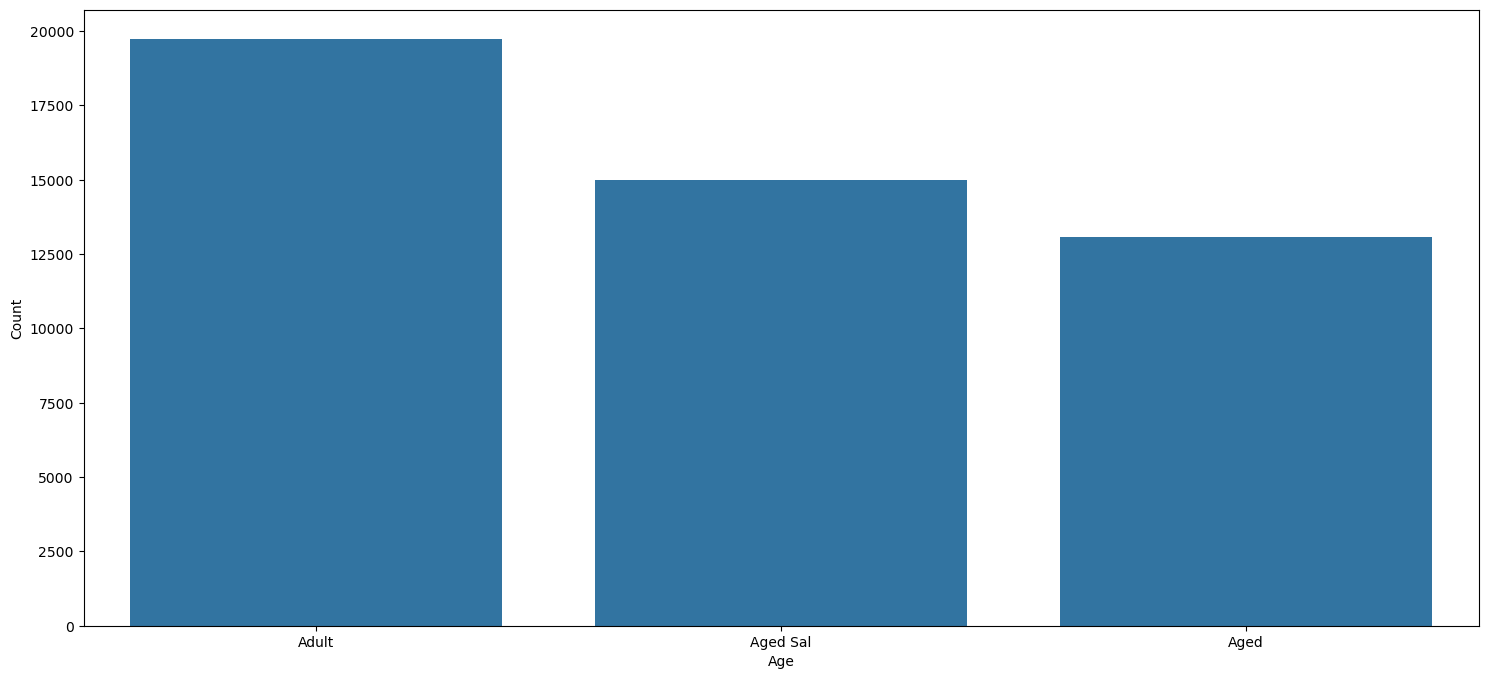

In [11]:
df['Age'].value_counts()
counts_df = pd.DataFrame({'Age': df['Age'].value_counts().index, 'Count': df['Age'].value_counts().values})

plt.figure(figsize=(18, 8))
sns.barplot(x='Age', y='Count', data=counts_df)
plt.show()

In [16]:
df.columns

Index(['Exp', 'Well ID', 'Field', 'Age', 'Sample', 'Type',
       'DAPI nucleus intensity mean', 'DAPI nucleus intensity sum',
       'Actin texture spot', 'Actin texture hole', 'Actin texture edge',
       'Actin texture ridge', 'Actin texture valley', 'Actin texture saddle',
       'Actin texture bright', 'Mito texture spot', 'Mito texture hole',
       'Mito texture edge', 'Mito texture ridge', 'Mito texture valley',
       'Mito texture saddle', 'Mito texture bright', 'Mito texture dark',
       'Actin cyto intensity mean', 'Actin cyto intensity sum',
       'Mito cyto intensity mean', 'Mito cyto intensity sum', 'Cell area',
       'Cell roundness', 'Cell width', 'Cell length'],
      dtype='object')

In [20]:
df_clean = df.drop(columns=['Exp', 'Well ID', 'Field', 'Type', 'Sample'])

In [21]:
df_clean

,Age,DAPI nucleus intensity mean,DAPI nucleus intensity sum,Actin texture spot,Actin texture hole,Actin texture edge,Actin texture ridge,Actin texture valley,Actin texture saddle,Actin texture bright,...,Mito texture bright,Mito texture dark,Actin cyto intensity mean,Actin cyto intensity sum,Mito cyto intensity mean,Mito cyto intensity sum,Cell area,Cell roundness,Cell width,Cell length
0,Adult,-0.752735,2.499605,-0.858850,-0.591850,-0.139382,-0.298921,-0.457690,-0.246375,-0.490903,...,-0.362513,-0.332713,0.779970,1.355900,1.635001,2.321151,1.113629,0.069641,1.931395,0.750946
1,Adult,-0.882185,-0.530725,1.812221,1.121009,-0.313890,1.039709,0.894286,1.128992,1.322533,...,1.471722,1.382034,-0.380731,-0.442269,-0.973069,-0.720079,-0.487470,-1.108797,-0.383170,-0.535294
2,Adult,-1.068765,-0.094207,0.598405,0.580899,1.207204,1.375337,1.239834,1.419850,1.205504,...,0.187152,0.193575,0.462667,0.200734,0.452950,0.157485,-0.032480,-0.357563,0.363628,0.089671
3,Adult,-0.134694,0.051729,-0.215467,-0.048021,-0.317018,0.068750,-0.037129,-0.064115,-0.016473,...,1.630623,0.789627,0.078896,-0.356392,0.086194,-0.500335,-0.585705,-0.503061,-1.558145,-0.190448
4,Adult,0.474889,0.032507,-0.874665,-0.806601,0.342798,0.255554,-0.282433,-0.140944,-0.074888,...,0.093929,0.216487,0.396752,-0.219858,-0.097788,-0.498561,-0.599703,0.137374,-1.309779,-0.322014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47812,Aged Sal,2.470433,0.671310,-0.860110,-1.238289,1.947121,0.028408,0.285343,0.749430,-0.405625,...,1.640571,1.575844,1.812393,-0.415001,2.337033,-0.396191,-0.547307,1.561166,-0.655438,-1.010576
47813,Aged Sal,1.262713,0.495542,-0.391640,-0.944441,2.617355,1.669361,1.559375,1.525484,0.747147,...,0.516875,0.563920,2.776093,0.511967,0.110328,-0.158461,-0.280950,0.640412,-0.569138,0.102975
47814,Aged Sal,1.360887,0.788403,-0.390262,-1.774903,3.558109,1.346244,1.591815,2.237637,0.552857,...,0.959451,0.659806,2.335795,-0.301947,-0.739689,-0.672158,-0.493366,0.831532,-0.400445,-0.924615
47815,Aged Sal,1.994019,0.721171,-0.599146,-1.415704,2.420429,0.121998,0.465209,0.793620,-0.217289,...,1.004182,0.901582,0.617971,-0.487712,-0.448927,-0.658007,-0.529745,0.935132,-0.502087,-0.841344


In [81]:
# Create new dataframe with only "Aged Sal" rows
aged_sal_df = df_clean[df_clean['Age'] == 'Aged Sal'].copy()

# Remove "Aged Sal" rows from original dataframe
df_ad_ag = df_clean[df_clean['Age'] != 'Aged Sal']

# Verify the split
print("Original dataframe shape:", df_clean.shape)
print("Aged Sal dataframe shape:", aged_sal_df.shape)
print("\nUnique values in original df Age column:", df_ad_ag['Age'].unique())
print("Unique values in aged_sal_df Age column:", aged_sal_df['Age'].unique())

Original dataframe shape: (47817, 26)
Aged Sal dataframe shape: (15003, 26)

Unique values in original df Age column: ['Adult' 'Aged']
Unique values in aged_sal_df Age column: ['Aged Sal']


In [24]:
df_ad_ag['Age'] = df_ad_ag['Age'].map({'Adult':0, 'Aged':1})
df_ad_ag

/var/folders/77/x6qg0ssj59b1b0t1ph730np40000gn/T/ipykernel_85978/3623449836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ad_ag['Age'] = df_ad_ag['Age'].map({'Adult':0, 'Aged':1})


,Age,DAPI nucleus intensity mean,DAPI nucleus intensity sum,Actin texture spot,Actin texture hole,Actin texture edge,Actin texture ridge,Actin texture valley,Actin texture saddle,Actin texture bright,...,Mito texture bright,Mito texture dark,Actin cyto intensity mean,Actin cyto intensity sum,Mito cyto intensity mean,Mito cyto intensity sum,Cell area,Cell roundness,Cell width,Cell length
0,0,-0.752735,2.499605,-0.858850,-0.591850,-0.139382,-0.298921,-0.457690,-0.246375,-0.490903,...,-0.362513,-0.332713,0.779970,1.355900,1.635001,2.321151,1.113629,0.069641,1.931395,0.750946
1,0,-0.882185,-0.530725,1.812221,1.121009,-0.313890,1.039709,0.894286,1.128992,1.322533,...,1.471722,1.382034,-0.380731,-0.442269,-0.973069,-0.720079,-0.487470,-1.108797,-0.383170,-0.535294
2,0,-1.068765,-0.094207,0.598405,0.580899,1.207204,1.375337,1.239834,1.419850,1.205504,...,0.187152,0.193575,0.462667,0.200734,0.452950,0.157485,-0.032480,-0.357563,0.363628,0.089671
3,0,-0.134694,0.051729,-0.215467,-0.048021,-0.317018,0.068750,-0.037129,-0.064115,-0.016473,...,1.630623,0.789627,0.078896,-0.356392,0.086194,-0.500335,-0.585705,-0.503061,-1.558145,-0.190448
4,0,0.474889,0.032507,-0.874665,-0.806601,0.342798,0.255554,-0.282433,-0.140944,-0.074888,...,0.093929,0.216487,0.396752,-0.219858,-0.097788,-0.498561,-0.599703,0.137374,-1.309779,-0.322014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43981,1,-0.284226,-0.411445,-0.292066,-0.501358,1.669484,0.993691,0.878751,0.835939,0.417851,...,0.964606,1.066947,-0.023552,-0.213487,-1.198513,-0.612461,-0.288477,-0.220692,-0.369268,-0.121895
43982,1,0.257864,-0.098776,-0.505058,-1.000626,1.981498,0.462044,0.751103,1.327415,0.019860,...,0.381596,0.397181,2.149550,0.493748,-0.612500,-0.354597,-0.234468,0.663112,-0.227489,-0.072108
43983,1,0.682836,-0.162847,-0.409563,-0.588317,1.704651,1.048647,0.918711,0.888958,0.379003,...,0.478987,0.112869,0.865633,-0.459320,-0.844087,-0.695497,-0.540268,1.139326,-0.708190,-1.052182
43984,1,-0.346319,-0.146756,1.742076,1.115701,1.314308,1.797946,1.809597,1.788663,1.825602,...,1.126978,1.073489,-1.120128,-0.044653,-0.994592,0.031197,0.552754,-1.559759,-0.047973,0.992724


In [25]:
df_X = df_ad_ag.drop(columns=['Age'])
df_X

,DAPI nucleus intensity mean,DAPI nucleus intensity sum,Actin texture spot,Actin texture hole,Actin texture edge,Actin texture ridge,Actin texture valley,Actin texture saddle,Actin texture bright,Mito texture spot,...,Mito texture bright,Mito texture dark,Actin cyto intensity mean,Actin cyto intensity sum,Mito cyto intensity mean,Mito cyto intensity sum,Cell area,Cell roundness,Cell width,Cell length
0,-0.752735,2.499605,-0.858850,-0.591850,-0.139382,-0.298921,-0.457690,-0.246375,-0.490903,-0.298845,...,-0.362513,-0.332713,0.779970,1.355900,1.635001,2.321151,1.113629,0.069641,1.931395,0.750946
1,-0.882185,-0.530725,1.812221,1.121009,-0.313890,1.039709,0.894286,1.128992,1.322533,1.413497,...,1.471722,1.382034,-0.380731,-0.442269,-0.973069,-0.720079,-0.487470,-1.108797,-0.383170,-0.535294
2,-1.068765,-0.094207,0.598405,0.580899,1.207204,1.375337,1.239834,1.419850,1.205504,0.653956,...,0.187152,0.193575,0.462667,0.200734,0.452950,0.157485,-0.032480,-0.357563,0.363628,0.089671
3,-0.134694,0.051729,-0.215467,-0.048021,-0.317018,0.068750,-0.037129,-0.064115,-0.016473,1.769627,...,1.630623,0.789627,0.078896,-0.356392,0.086194,-0.500335,-0.585705,-0.503061,-1.558145,-0.190448
4,0.474889,0.032507,-0.874665,-0.806601,0.342798,0.255554,-0.282433,-0.140944,-0.074888,-0.335096,...,0.093929,0.216487,0.396752,-0.219858,-0.097788,-0.498561,-0.599703,0.137374,-1.309779,-0.322014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43981,-0.284226,-0.411445,-0.292066,-0.501358,1.669484,0.993691,0.878751,0.835939,0.417851,1.018299,...,0.964606,1.066947,-0.023552,-0.213487,-1.198513,-0.612461,-0.288477,-0.220692,-0.369268,-0.121895
43982,0.257864,-0.098776,-0.505058,-1.000626,1.981498,0.462044,0.751103,1.327415,0.019860,0.489159,...,0.381596,0.397181,2.149550,0.493748,-0.612500,-0.354597,-0.234468,0.663112,-0.227489,-0.072108
43983,0.682836,-0.162847,-0.409563,-0.588317,1.704651,1.048647,0.918711,0.888958,0.379003,0.774527,...,0.478987,0.112869,0.865633,-0.459320,-0.844087,-0.695497,-0.540268,1.139326,-0.708190,-1.052182
43984,-0.346319,-0.146756,1.742076,1.115701,1.314308,1.797946,1.809597,1.788663,1.825602,1.209117,...,1.126978,1.073489,-1.120128,-0.044653,-0.994592,0.031197,0.552754,-1.559759,-0.047973,0.992724


In [ ]:
aged_sal_df = aged_sal_df.drop(columns=['Age'])

In [87]:
aged_sal_df
ss_ags = StandardScaler()
predict_sal = ss_ags.fit_transform(aged_sal_df)
predict_sal

array([[-1.48943168, -0.34439046,  0.50566266, ...,  0.73759769,
         1.46937829,  0.07645709],
       [-0.2036792 , -0.08536861, -0.07285001, ...,  0.39653464,
         0.30254108, -0.90679819],
       [-0.16833632, -0.02737436, -0.13333459, ...,  0.63793477,
         0.10383401, -0.44189587],
       ...,
       [ 1.40291758,  0.69277506, -0.33062524, ...,  0.74433683,
        -0.40129564, -0.90872682],
       [ 2.03428255,  0.62946979, -0.54982728, ...,  0.84877102,
        -0.51165148, -0.82202155],
       [ 0.98522738,  0.97333179, -1.07279423, ...,  1.15297269,
        -0.29733436, -0.74082021]])

In [80]:
aged_sal_df = aged_sal_df.drop(columns=['Age'])
ss_train = StandardScaler()
predict_sal = ss_train.fit_transform(aged_sal_df)
predict_sal


AttributeError: 'NoneType' object has no attribute 'drop'

In [79]:
aged_sal_df

In [26]:
df_y = df_ad_ag['Age']
df_y

0        0
1        0
2        0
3        0
4        0
        ..
43981    1
43982    1
43983    1
43984    1
43985    1
Name: Age, Length: 32814, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y , test_size=0.25, random_state=0)

In [29]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [31]:
print(X_train.shape, X_test.shape)

(24610, 25) (8204, 25)


In [40]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(max_iter=1000,solver='lbfgs')

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
models['Gradient Boosting'] = GradientBoostingClassifier()

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
models['AdaBoost'] = AdaBoostClassifier()

# XGBoost
from xgboost import XGBClassifier
models['XGBoost'] = XGBClassifier()

# MLP Classifier
from sklearn.neural_network import MLPClassifier
models['MLP Classifier'] = MLPClassifier()

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
models['QDA'] = QuadraticDiscriminantAnalysis()




In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.603608,0.154467,0.550586
Support Vector Machines,0.603364,0.144607,0.553143
Decision Trees,0.612019,0.507320,0.525371
Random Forest,0.702584,0.428742,0.731024
Naive Bayes,0.590322,0.371676,0.497202
K-Nearest Neighbor,0.655534,0.509411,0.590170
Gradient Boosting,0.664676,0.310128,0.701351
AdaBoost,0.640785,0.277562,0.637174
XGBoost,0.693930,0.496863,0.667871
MLP Classifier,0.692833,0.531222,0.651521


In [44]:
df_model = df_model.mul(100).round(2)

In [127]:
df_model = df_model.drop('QDA')

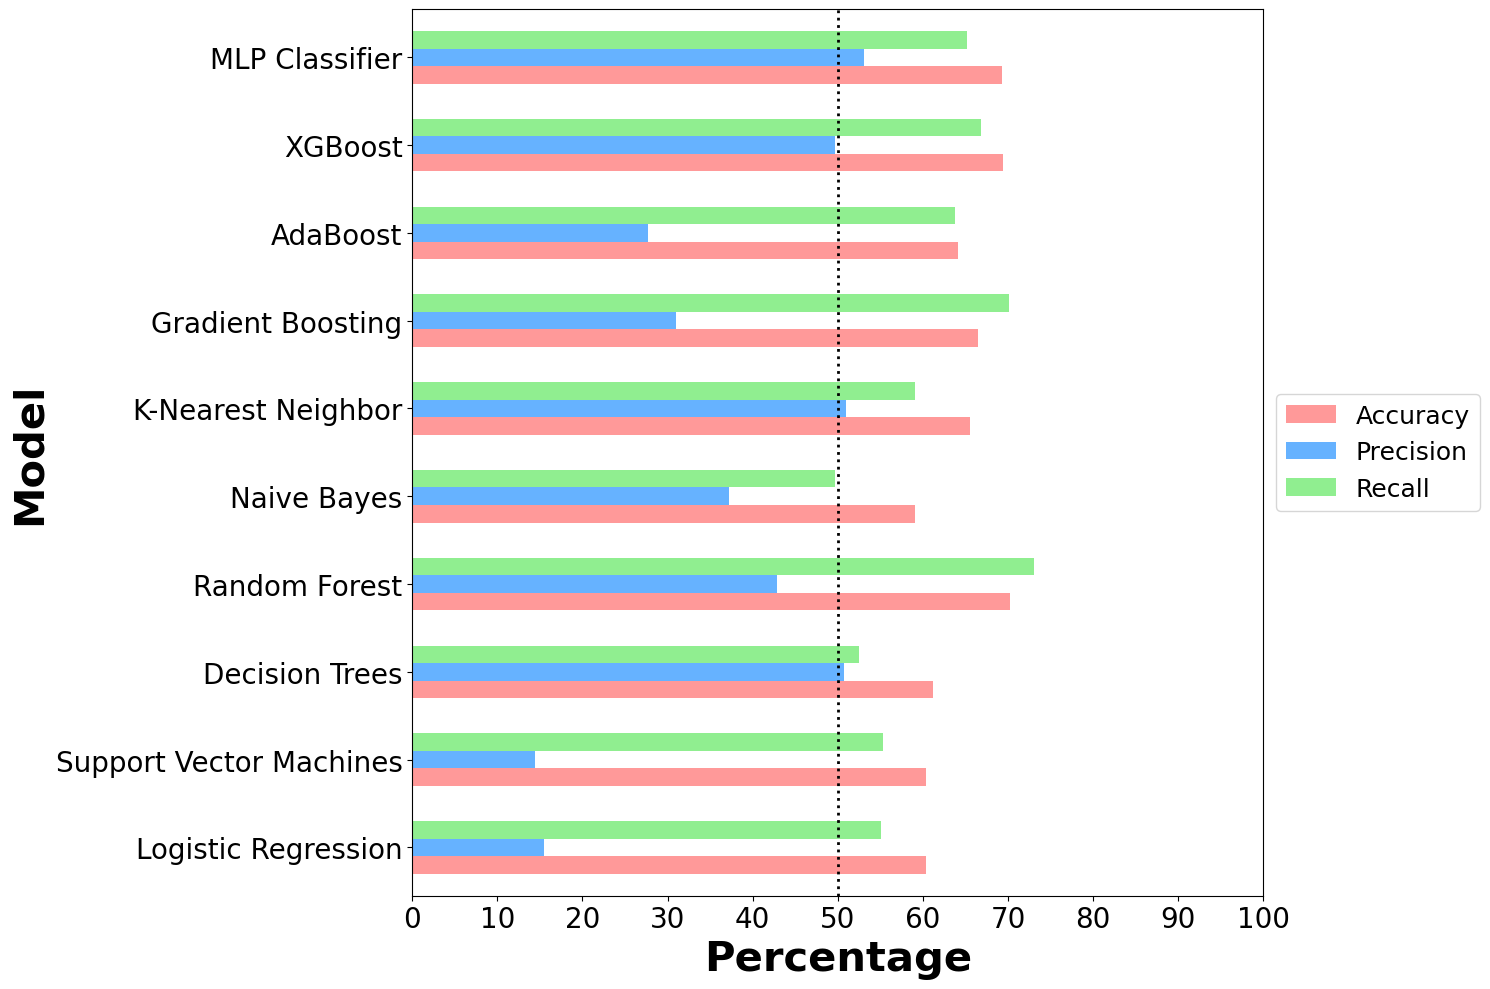

In [138]:
ax = df_model.plot.barh(
    figsize=(15, 10), 
    color=['#FF9999', '#66B2FF', '#90EE90'], 
    width=0.6  # Use width to control spacing between bars
)

ax.axvline(x=50, color='black', linestyle=':', linewidth=2)

ax.set_xticks(range(0, 101, 10))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Percentage', fontsize=30, fontweight='bold')
ax.set_ylabel('Model', fontsize=30, fontweight='bold')

ax.legend(
    ncol=1,
    bbox_to_anchor=(1, 0.5),
    loc='center left',
    prop={'size': 18}
)

plt.tight_layout()

In [139]:
sal_predictions = models['MLP Classifier'].predict(predict_sal)
sal_predictions_rf = models['Random Forest'].predict(predict_sal)
sal_predictions_knn = models['K-Nearest Neighbor'].predict(predict_sal)
sal_predictions_dt = models['Decision Trees'].predict(predict_sal)
sal_predictions_xgb = models['XGBoost'].predict(predict_sal)

In [140]:
aged_sal_df['Age_Predict_MLP'] = sal_predictions
aged_sal_df['Age_Predict_RF'] = sal_predictions_rf
aged_sal_df['Age_Predict_KNN'] = sal_predictions_knn
aged_sal_df['Age_Predict_DT'] = sal_predictions_dt
aged_sal_df['Age_Predict_XGB'] = sal_predictions_xgb

In [132]:
aged_sal_df['Age_Predict_RF'].value_counts()

Age_Predict_RF
0    10914
1     4089
Name: count, dtype: int64

In [133]:
aged_sal_df['Age_Predict_KNN'].value_counts()

Age_Predict_KNN
0    8578
1    6425
Name: count, dtype: int64

In [134]:
aged_sal_df['Age_Predict_MLP'].value_counts()

Age_Predict_MLP
0    8471
1    6532
Name: count, dtype: int64

In [141]:
aged_sal_df['Age_Predict_DT'].value_counts()

Age_Predict_DT
0    8754
1    6249
Name: count, dtype: int64

In [142]:
aged_sal_df['Age_Predict_XGB'].value_counts()

Age_Predict_XGB
0    9804
1    5199
Name: count, dtype: int64

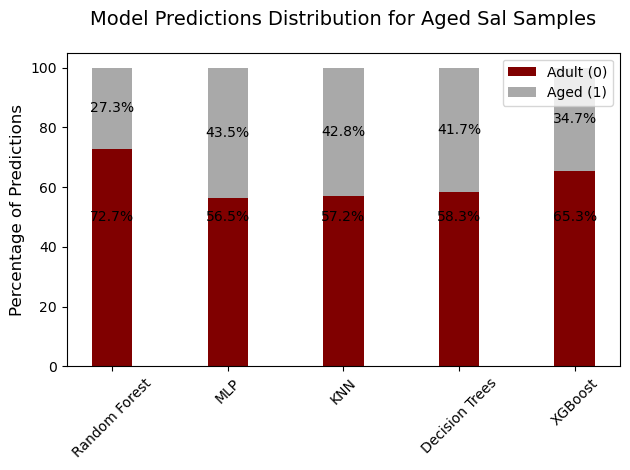

In [147]:
# Create consistent colors for Adult and Aged predictions
colors = ['maroon', 'darkgrey']

# Get predictions for each model
prediction_cols = ['Age_Predict_RF', 'Age_Predict_MLP', 'Age_Predict_KNN', 'Age_Predict_DT', 'Age_Predict_XGB']
model_names = ['Random Forest', 'MLP', 'KNN', 'Decision Trees', 'XGBoost']

# Create bars for each model
x = np.arange(len(model_names))
width = 0.35

# Calculate percentages for each model
predictions = []
for col in prediction_cols:
    counts = aged_sal_df[col].value_counts(normalize=True) * 100
    predictions.append([counts.get(0, 0), counts.get(1, 0)])

predictions = np.array(predictions)

# Create stacked bars
plt.bar(x, predictions[:, 0], width, label='Adult (0)', color=colors[0])
plt.bar(x, predictions[:, 1], width, bottom=predictions[:, 0], label='Aged (1)', color=colors[1])

# Customize the plot
plt.ylabel('Percentage of Predictions', fontsize=12)
plt.title('Model Predictions Distribution for Aged Sal Samples', fontsize=14, pad=20)
plt.xticks(x, model_names, rotation=45)
plt.legend()

# Add percentage labels on bars
for i in range(len(x)):
    plt.text(x[i], 50, f'{predictions[i,0]:.1f}%', ha='center', va='center')
    plt.text(x[i], predictions[i,0] + predictions[i,1]/2, f'{predictions[i,1]:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

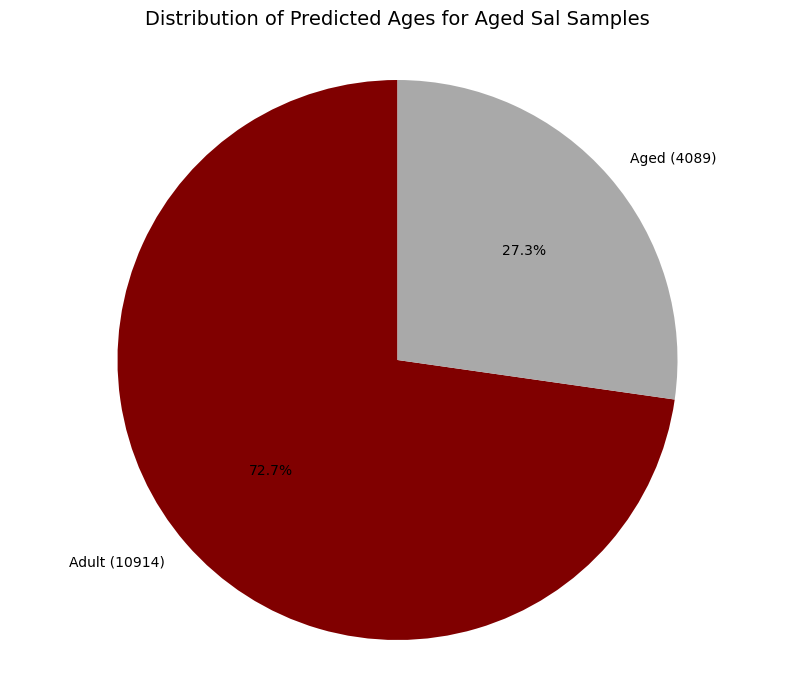

In [135]:
plt.figure(figsize=(10, 8))
counts = aged_sal_df['Age_Predict_RF'].value_counts()
colors = ['maroon', 'darkgrey']
plt.pie(counts.values, labels=[f'Adult ({counts[0]})', f'Aged ({counts[1]})'], 
    autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Predicted Ages for Aged Sal Samples', pad=20, fontsize=14)
plt.axis('equal')
plt.show()

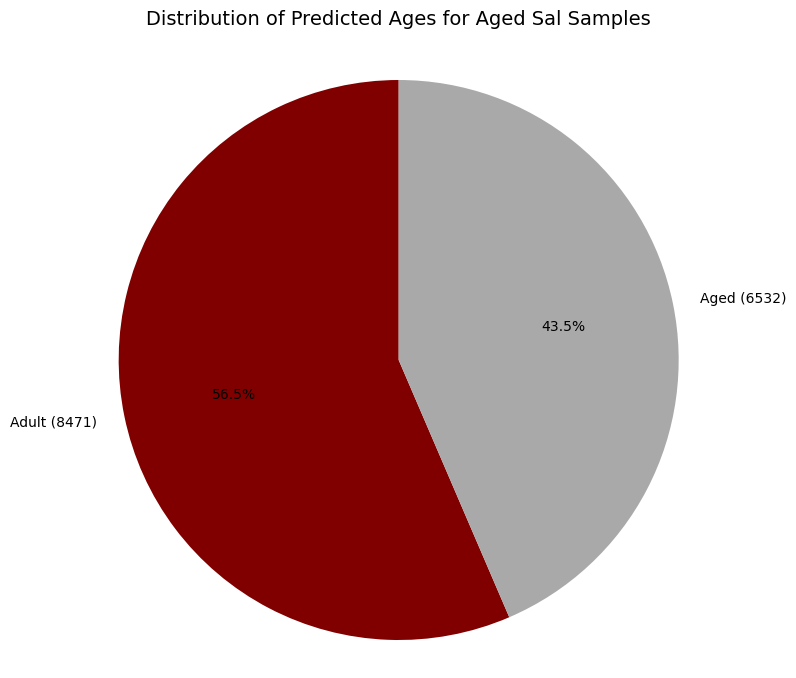

In [136]:
plt.figure(figsize=(10, 8))
counts = aged_sal_df['Age_Predict_MLP'].value_counts()
colors = ['maroon', 'darkgrey']
plt.pie(counts.values, labels=[f'Adult ({counts[0]})', f'Aged ({counts[1]})'], 
    autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Predicted Ages for Aged Sal Samples', pad=20, fontsize=14)
plt.axis('equal')
plt.show()

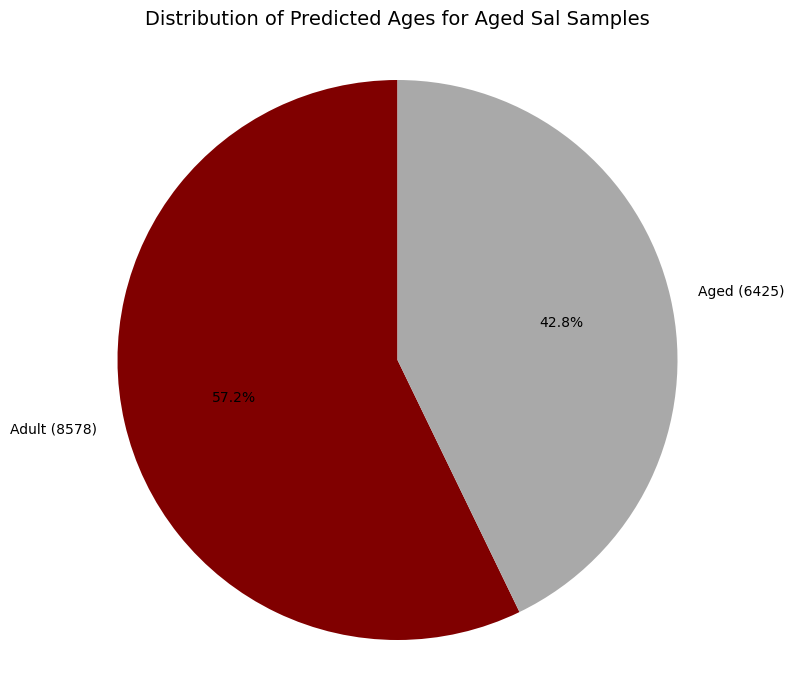

In [137]:
plt.figure(figsize=(10, 8))
counts = aged_sal_df['Age_Predict_KNN'].value_counts()
colors = ['maroon', 'darkgrey']
plt.pie(counts.values, labels=[f'Adult ({counts[0]})', f'Aged ({counts[1]})'], 
    autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Predicted Ages for Aged Sal Samples', pad=20, fontsize=14)
plt.axis('equal')
plt.show()

In [34]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
print("score on test: " + str(lr.score(X_test, y_test)))

score on test: 0.6043393466601658


/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
relevant_data_df = deepcopy(data_df.loc[:, relevant_features])
    age_label = list(data_df['Age'])
    y = age_label
    X = deepcopy(relevant_data_df)
    X = RobustScaler().fit_transform(X)
    univariate_selector = SelectKBest().fit(X,y)
    idx = univariate_selector.get_support(True)
    selected_features = pd.DataFrame({k: [v] for k, v in zip(relevant_data_df.columns[idx], univariate_selector.scores_[idx])},
                                     index=['F_values']).T.sort_values('F_values', ascending=False).astype(int)
    selected_features = selected_features[: num_features]

In [ ]:
relevant_data_df = data_combined_norm.loc[:, selected_features.index.tolist()]
data_scaled = StandardScaler().fit_transform(relevant_data_df)